MIE424 (2022 Winter) Lab 7: SVM implementation
======

## SVM implementation using `scikit-learn`

### Basics of `sklearn.svm`

In [1]:
from sklearn import svm

In [2]:
X = [[0, 0], [1, 1]];
y = [-1, 1,];
clf = svm.SVC();
clf.fit(X, y);

Use `.predict()` to make predictions.

In [3]:
clf.predict([[0., 0.5]])

array([-1])

`.support vectors` gives the support vectors.

In [4]:
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

`clf.support_` gives the indices of support vectors.

In [5]:
clf.support_

array([0, 1], dtype=int32)

To find out more, the documnetation for [sklearn.svm](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) could be helpful.

For the function used in this example [(`sklearn.svm.SVC`: Support Vector Classification), documentation can be found here.](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

### Examples of SVM classifiers in the iris dataset

We are using the 'iris' dataset in this tutorial.

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

[More information](https://en.wikipedia.org/wiki/Iris_flower_data_set) about this [dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset).

For our tutorial, only the first two features are used and only first 100 datapoints (2 types out of 3) are selected.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
y = y[np.where(y<2)[0]]
X = X[np.where(y<2)[0]]

In [9]:
C = 1.0  # SVM regularization parameter
models = (svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=5, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

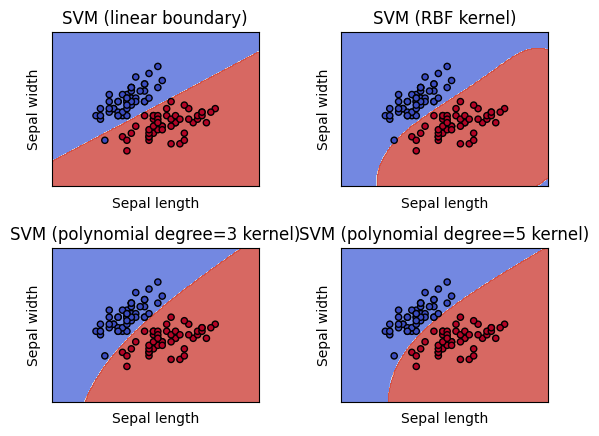

In [10]:
# Plot the results
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

titles = ('SVM (linear boundary)',
          'SVM (RBF kernel)',
          'SVM (polynomial degree=3 kernel)',
          'SVM (polynomial degree=5 kernel)')

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## SVM implementation using `cvxpy`

In [12]:
!pip install cvxpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [361 lines of output]
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.1 MB ? eta -:--:--
           ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 0.5/1.1 MB 16.2 MB/s eta 0:00:01
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.1/1.1 MB 17.7 MB/s eta 0:00:01
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.2 MB/s eta 0:00:00
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/64.5 kB ? eta -:--:--
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 2.7 MB/s eta 0:00:00
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/43.8 kB ? eta -:--:--
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [13]:
import cvxpy as cp
import numpy as np

ModuleNotFoundError: No module named 'cvxpy'

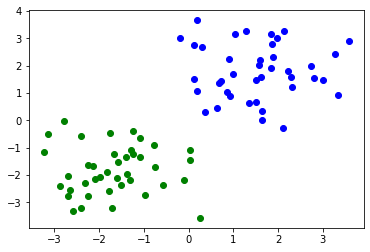

In [17]:
np.random.seed(424)

x1 = np.random.normal(2, 1, (2, 40));
x2 = np.random.normal(-2, 1, (2, 40));
plt.scatter(x1[0, :], x1[1, :], color='blue');
plt.scatter(x2[0, :], x2[1, :], color='green');
plt.show()

Hard-margin SVM optimization problem implementation:

In [18]:
w = cp.Variable(2); 
b = cp.Variable();
obj = cp.norm(w,2)**2/2
constraints = []

for i in range(40):
    constraints.append(1*(w.T@x1[:,i]+b)>=1)
    constraints.append((-1)*(w.T@x2[:,i]+b)>=1)
cp.Problem(cp.Minimize(obj), constraints).solve();

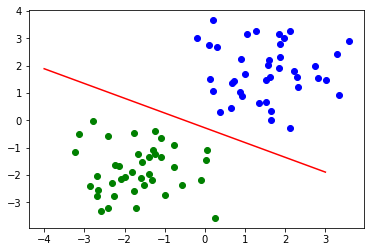

In [19]:
x = np.arange(-4, 4)
y = -(w.value[0] * x + b.value) / w.value[1]
plt.plot(x, y, color='red')
plt.scatter(x1[0, :], x1[1, :], color='blue')
plt.scatter(x2[0, :], x2[1, :], color='green')
plt.show()

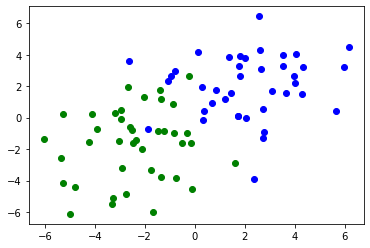

In [21]:
np.random.seed(2022)

x1 = np.random.normal(2, 2, (2, 40));
x2 = np.random.normal(-2, 2, (2, 40));
plt.scatter(x1[0, :], x1[1, :], color='blue');
plt.scatter(x2[0, :], x2[1, :], color='green');
plt.show()

In [22]:
w = cp.Variable(2); 
b = cp.Variable();
obj = cp.norm(w,2)**2/2
constraints = []

for i in range(40):
    constraints.append(1*(w.T@x1[:,i]+b)>=1)
    constraints.append((-1)*(w.T@x2[:,i]+b)>=1)
problem = cp.Problem(cp.Minimize(obj), constraints);
problem.solve();

In [23]:
problem.status

'infeasible'

Soft-margin SVM optimization problem implementation:

In [47]:
w = cp.Variable(2); 
b = cp.Variable();
xi1 = cp.Variable(40);
xi2 = cp.Variable(40);
obj = cp.norm(w,2)**2/2 + C * cp.sum(xi1)+ C * cp.sum(xi2)
constraints = []
constraints.append(xi1>=0)
constraints.append(xi2>=0)
for i in range(40):
    constraints.append(1*(w.T@x1[:,i]+b)>=1-xi1[i])
    constraints.append((-1)*(w.T@x2[:,i]+b)>=1-xi2[i])
cp.Problem(cp.Minimize(obj), constraints).solve();

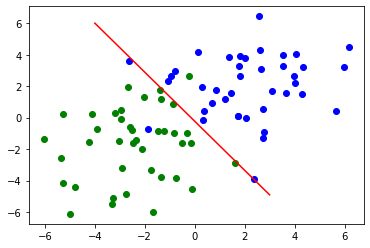

In [48]:
x = np.arange(-4, 4)
y = -(w.value[0] * x + b.value) / w.value[1]
plt.plot(x, y, color='red')
plt.scatter(x1[0, :], x1[1, :], color='blue')
plt.scatter(x2[0, :], x2[1, :], color='green')
plt.show()

In [49]:
print(w.value.T@x1+b.value)
print(w.value.T@x2+b.value)

[ 4.42939972  2.52213211  1.88681592  7.92137683  6.63892847  6.04572272
  5.34002948  4.180306    1.99678805  2.24834097  3.54996808 -0.13740709
  5.24283532  0.55268448  1.60882504  5.40693223  6.6180236   0.40684049
  2.10150874  2.05950059  3.89559262  5.65506634  1.90644828  0.8628814
 -2.14270774  4.67765259  2.08291576  6.37828132  4.63555941  0.01664752
  3.12087872  4.30487473  2.86514836  1.21813538  8.9304589   3.88272254
  5.61750228  5.89886977  1.39870812  0.7858903 ]
[-7.27470692 -6.46452709 -2.97638721 -2.77543336 -4.81876812 -4.6532392
 -3.62881152  1.56026125 -0.43596253 -6.19287739 -0.16113398 -1.34933952
 -4.94502667 -3.49022104 -2.75954603 -2.79688551 -1.         -1.23626002
 -3.12496426 -4.10787725 -2.71495458 -7.56962552 -6.54060945 -5.53983925
 -0.75735372 -3.70832784 -1.57974528 -1.         -1.28377607 -5.18524134
 -1.81981181 -3.00216019 -2.77817268 -8.49926852 -3.71531491 -0.11511354
 -6.66362958 -0.07339522 -3.26089502 -2.41723764]


In [64]:
print(np.where(1-np.isclose(xi1.value,0)))
print(np.where(1-np.isclose(xi2.value,0)))

(array([11, 13, 17, 23, 24, 29, 39], dtype=int64),)
(array([ 7,  8, 10, 24, 35, 37], dtype=int64),)


Check if the results from cvxpy is the same with SVM in sklearn.

In [52]:
print(w.value)
print(b.value)

[0.96982348 0.6220687 ]
0.14209397364867332


In [53]:
x = np.zeros((2,80))
x[:,0:40]=x1
x[:,40:81]=x2

y = np.zeros(80)
y[0:40]=1
y[40:81]=-1

clf = svm.SVC(kernel='linear');
clf.fit(np.transpose(x), y);

print(clf.coef_)
print(clf.intercept_)

[[0.96982343 0.62206887]]
[0.14209386]


## Multi-class SVM Example

`sklearn.svm.SVC` implement the “one-versus-one” approach for multi-class classification. In total, `n_classes * (n_classes - 1) / 2` classifiers are constructed and each one trains data from two classes. Each data point is then classified according to a majority vote amongst the classifiers.

In [54]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
y = y
X = X

In [55]:
C = 1.0  # SVM regularization parameter
models = (svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=5, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

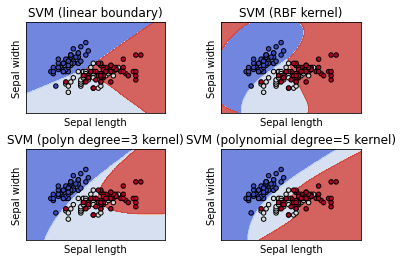

In [56]:
# Plot the results
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

titles = ('SVM (linear boundary)',
          'SVM (RBF kernel)',
          'SVM (polyn degree=3 kernel)',
          'SVM (polynomial degree=5 kernel)')
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)



plt.show()